In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

/Users/anshumannandy/Desktop/AnacondaFolder/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
from fastai.text import *

In [3]:
path = '/notebooks/course-v3/newsData'

In [4]:
bs=48

In [5]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))

data_lm.save('data_lm.pkl')

In [6]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [7]:
data_lm.show_batch()

idx,text
0,"to make an in app purchase . xxmaj nintendo and xxmaj mario fans are xxunk that xxmaj nintendo would release a game for free and then charge to play it . xxmaj nintendo says they will take the game back to the drawing board , and try and release a free version at a later time . xxbos youtube 's xxmaj zero xxmaj percent xxmaj error xxmaj rate on xxmaj"
1,"nasa launched a new rocket into the deep middle earth today , in order to xxunk the xxunk of the next rocket xxunk . xxup nasa tried to xxunk the xxunk of people who want to xxunk into space by showing that the xxunk are less likely now that a rocket xxunk into the ground and now you are more likely to xxunk a trip to xxmaj mars . xxmaj"
2,"online starting xxmaj friday . xxbos xxmaj google has a new feature called "" find a friend "" . xxmaj this feature allows a user to identify a friends location without them sharing the location . xxmaj if your in xxmaj central park or xxmaj xxunk xxmaj gate xxmaj park and you know your friend is there as well you can find them in the park using this feature with"
3,"xxmaj brands like xxmaj xxunk , xxmaj xxunk xxmaj xxunk , xxmaj fossil , xxmaj michael xxmaj xxunk , and xxmaj xxunk were all xxunk by the xxunk in smartwatch purchases . xxmaj all of the watches xxunk the new xxmaj android xxmaj wear xxunk operating system , and were powered by a xxmaj xxunk xxmaj wear xxunk xxunk . xxmaj even with a high - xxunk full - xxup"
4,"commented "" these devices will be xxunk in allowing us to xxunk and xxunk drug xxunk in cargo in transit to the xxup us . xxmaj previously it would take xxunk of agents to xxunk the work of several of these sensors "" . xxmaj the project , which is in it 's final stages , is being conducted by the xxup us xxunk advanced research agency . xxbos xxmaj"


In [8]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


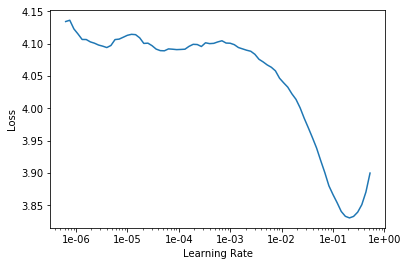

In [10]:
learn.recorder.plot(skip_end=15)

In [11]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.881841,3.537263,0.324603,00:05


In [12]:
learn.save('fit_head')

In [13]:
learn.load('fit_head');

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.470602,3.431334,0.337599,00:07
1,3.341698,3.314756,0.349603,00:07
2,3.142592,3.260751,0.356349,00:07
3,2.867848,3.265195,0.356151,00:07
4,2.529167,3.341510,0.356250,00:07
5,2.170595,3.415132,0.357837,00:07
6,1.837915,3.507362,0.353075,00:07
7,1.557971,3.562255,0.356647,00:07
8,1.344136,3.602437,0.356548,00:07
9,1.199224,3.609449,0.354762,00:07


In [16]:
learn.save('fine_tuned')

In [17]:
learn.load('fine_tuned');

In [18]:
TEXT = "President Trump is"
N_WORDS = 20
N_SENTENCES = 2

In [19]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

President Trump is seen in some media outlets as a member of Congress ' executive investigation body , responsible for protecting the
President Trump is showing about Walking Dead backing fans and shows what is to be a complete reunion of his fan


In [20]:
learn.save_encoder('fine_tuned_enc')

# Classifier

In [21]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['fake', 'legit'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [22]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [23]:
data_clas.show_batch()

text,target
"xxbos xxmaj why xxmaj superman is missing in the ' xxmaj justice xxmaj league ' trailer \n \n xxmaj after the full "" xxmaj justice xxmaj league "" trailer dropped on xxmaj saturday many fans had one major question : "" xxmaj where is xxmaj superman ? "" xxmaj some said the clip which features the xxunk of xxmaj xxunk the xxmaj xxunk xxmaj xxunk and xxmaj wonder xxmaj",legit
"xxbos xxmaj xxunk xxmaj baby xxmaj xxunk ! xxmaj george xxmaj michael portrait bought at auction by xxmaj anti - xxmaj xxunk xxmaj orlando xxmaj xxunk xxmaj protesters goes up in xxunk ! \n \n xxmaj like the xxmaj xxunk xxmaj xxunk , the xxmaj orlando xxmaj xxunk group could n't pass up a chance to dance on a xxunk . a portrait of the late xxmaj george xxmaj",fake
"xxbos xxmaj superman to xxmaj not xxmaj appear in "" xxmaj justice xxmaj league "" xxmaj movie \n \n xxmaj when the new trailer for "" xxmaj justice xxmaj league "" appeared xxmaj saturday , most fans , and even xxunk viewers alike , noted the xxunk lack of the iconic xxmaj superman . xxmaj most felt that the "" xxmaj justice xxmaj league "" was not complete ,",fake
"xxbos xxmaj judge tells xxmaj stein , ' xxmaj your money 's no good here ! ' during xxunk for a recount . \n \n \n \n xxup xxunk , xxmaj xxunk -- xxmaj it looks as if xxmaj green xxmaj party candidate , and former xxunk , xxmaj jill ' xxmaj xxunk ' xxmaj stein knows no xxunk when it comes to xxunk votes . xxmaj according to",fake
"xxbos xxmaj olivia xxmaj newton - xxmaj john xxunk at possible reunion with xxmaj john xxmaj travolta for 40th anniversary of ' xxmaj grease ' \n \n xxmaj good news for fans xxunk xxunk to "" xxmaj grease "" stars xxmaj john xxmaj travolta and xxmaj olivia xxmaj newton - xxmaj john . xxmaj xxunk - xxmaj john told xxmaj britain 's xxmaj the xxmaj mirror that a reunion",legit


In [24]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


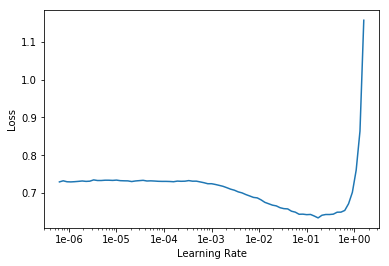

In [26]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.584073,0.641401,0.666667,00:03
1,0.576883,0.600776,0.696970,00:03
2,0.557193,0.585714,0.696970,00:03


In [31]:
learn.save('first')

In [32]:
learn.load('first');

In [34]:
learn.freeze_to(-2)
learn.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.536153,0.620931,0.646465,00:04
1,0.476793,0.532504,0.727273,00:04
2,0.423659,0.520402,0.727273,00:04


In [35]:
learn.save('second')

In [36]:
learn.load('second');

In [42]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.118927,0.431176,0.808081,00:06


In [43]:
learn.save('third')

In [44]:
learn.load('third');

In [45]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.134629,0.445230,0.818182,00:07
1,0.121076,0.456818,0.808081,00:07


In [58]:
string = 'Oh, Jen. Shes probably so happy inside, even though she would never admit it for fear of coming across as petty. Think about it – this is the same man who humiliated her by dumping her for another woman, and now hes the single one while shes happily or seemingly happily married. And hes texting her Its all her dreams coming true.'

In [59]:
learn.predict(string)

(Category fake, tensor(0), tensor([0.8747, 0.1253]))